In [3]:
# native
import pandas as pd 
import sys
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# local
sys.path.append('..')
from data.loader import SpectralData

In [4]:
loader = SpectralData()
data = loader.data
data_long = loader.tidy()

In [3]:
data.head()

,id,ndf,ndfq50,is_kfarm,season,pasture,PC1,PC2,410,435,...,645,680,705,730,760,810,860,900,940,lidar
0,0,34.9552,False,True,MayJun,Moderate,0.031493,0.127573,570.006000,647.484000,...,525.381000,1133.298000,735.342000,749.411000,671.498000,2931.260,3155.453000,3677.037000,3685.239000,37.100000
1,1,43.5450,False,True,MayJun,Good,1.259880,-0.586282,803.893000,877.844000,...,678.856000,1946.628000,1147.397000,747.908000,650.693000,4571.541,5614.555000,6592.979000,6640.264000,49.800000
2,2,60.1546,True,True,MayJun,Good,-1.003597,0.079748,364.382727,413.844545,...,374.538182,801.054546,453.595455,455.204545,469.780909,1959.120,2212.176364,2540.531818,2720.295455,40.727273
3,3,41.5438,False,True,MayJun,Poor,0.760041,-0.552493,739.437000,750.909000,...,596.388000,1751.527000,938.788000,594.413000,599.648000,3967.791,5109.403000,6061.576000,6256.911000,48.000000
4,4,44.7612,False,False,MayJun,Poor,1.410093,-0.732798,914.458000,961.933000,...,660.130000,2049.604000,1374.399000,721.997000,628.067000,4895.498,5780.298000,6852.340000,6316.058000,39.200000


In [4]:
data_long.head()

,id,ndf,ndfq50,is_kfarm,season,pasture,PC1,PC2,wv,value
0,0,34.9552,False,True,MayJun,Moderate,0.031493,0.127573,410,570.006000
1,1,43.5450,False,True,MayJun,Good,1.259880,-0.586282,410,803.893000
2,2,60.1546,True,True,MayJun,Good,-1.003597,0.079748,410,364.382727
3,3,41.5438,False,True,MayJun,Poor,0.760041,-0.552493,410,739.437000
4,4,44.7612,False,False,MayJun,Poor,1.410093,-0.732798,410,914.458000


In [5]:
sns.set(style="whitegrid")

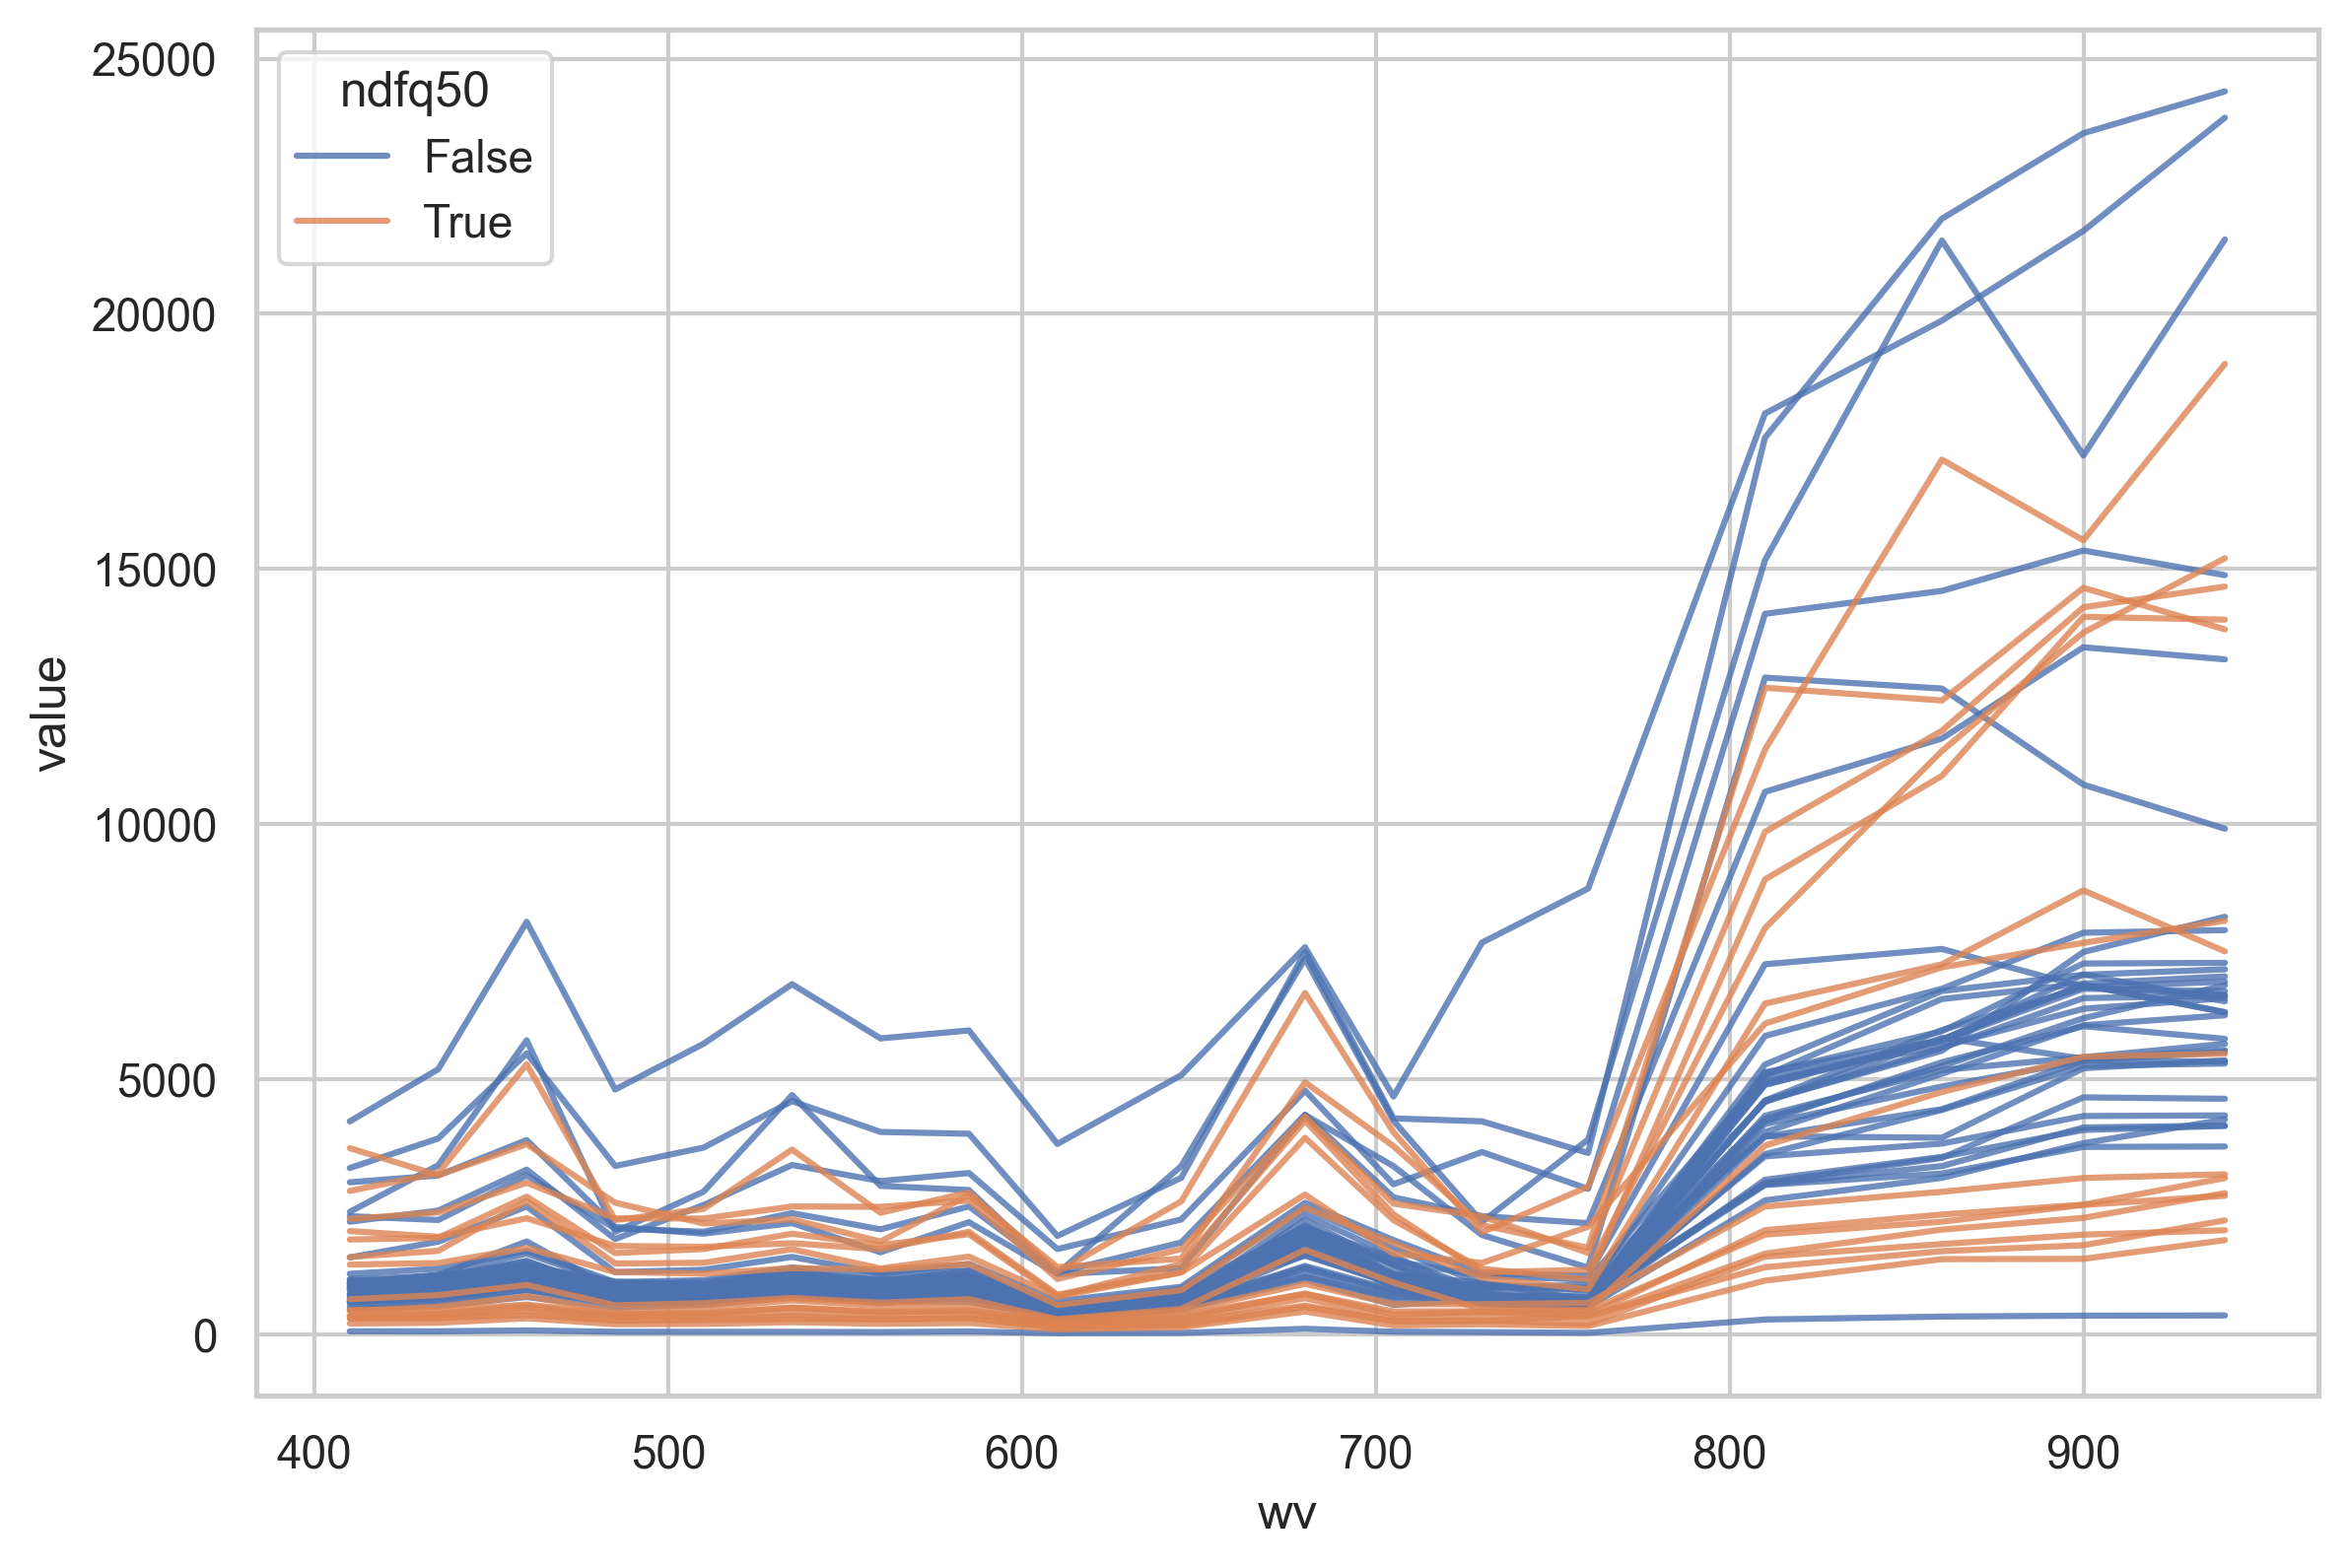

In [26]:
sns.set_theme(style="whitegrid")
palette = ["#39B1B5", "#E88471",]
plt.figure(figsize=(9, 6), dpi=300)
sns.lineplot(x="wv", y="value", hue="ndfq50", 
             alpha=.8, 
             data=data_long.query("id < 50"), 
             units='id', estimator=None)
plt.savefig("../out/real_spectral_lineplot.png", dpi=300)

### Correlation between spectral features and the target variable

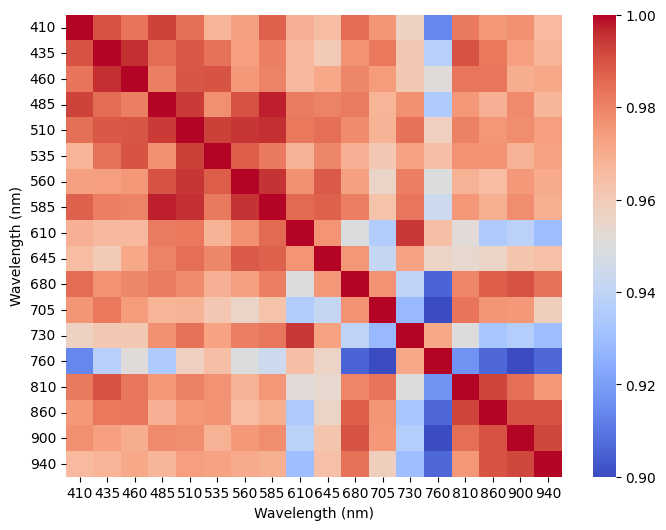

In [6]:
spec_cor = loader.X(in_array=False).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(spec_cor, cmap='coolwarm', 
            center=0.95, vmin=0.9, vmax=1)
plt.xlabel("Wavelength (nm)")
plt.ylabel("Wavelength (nm)")
plt.savefig("../out/real_spectral_correlation.png", dpi=300)

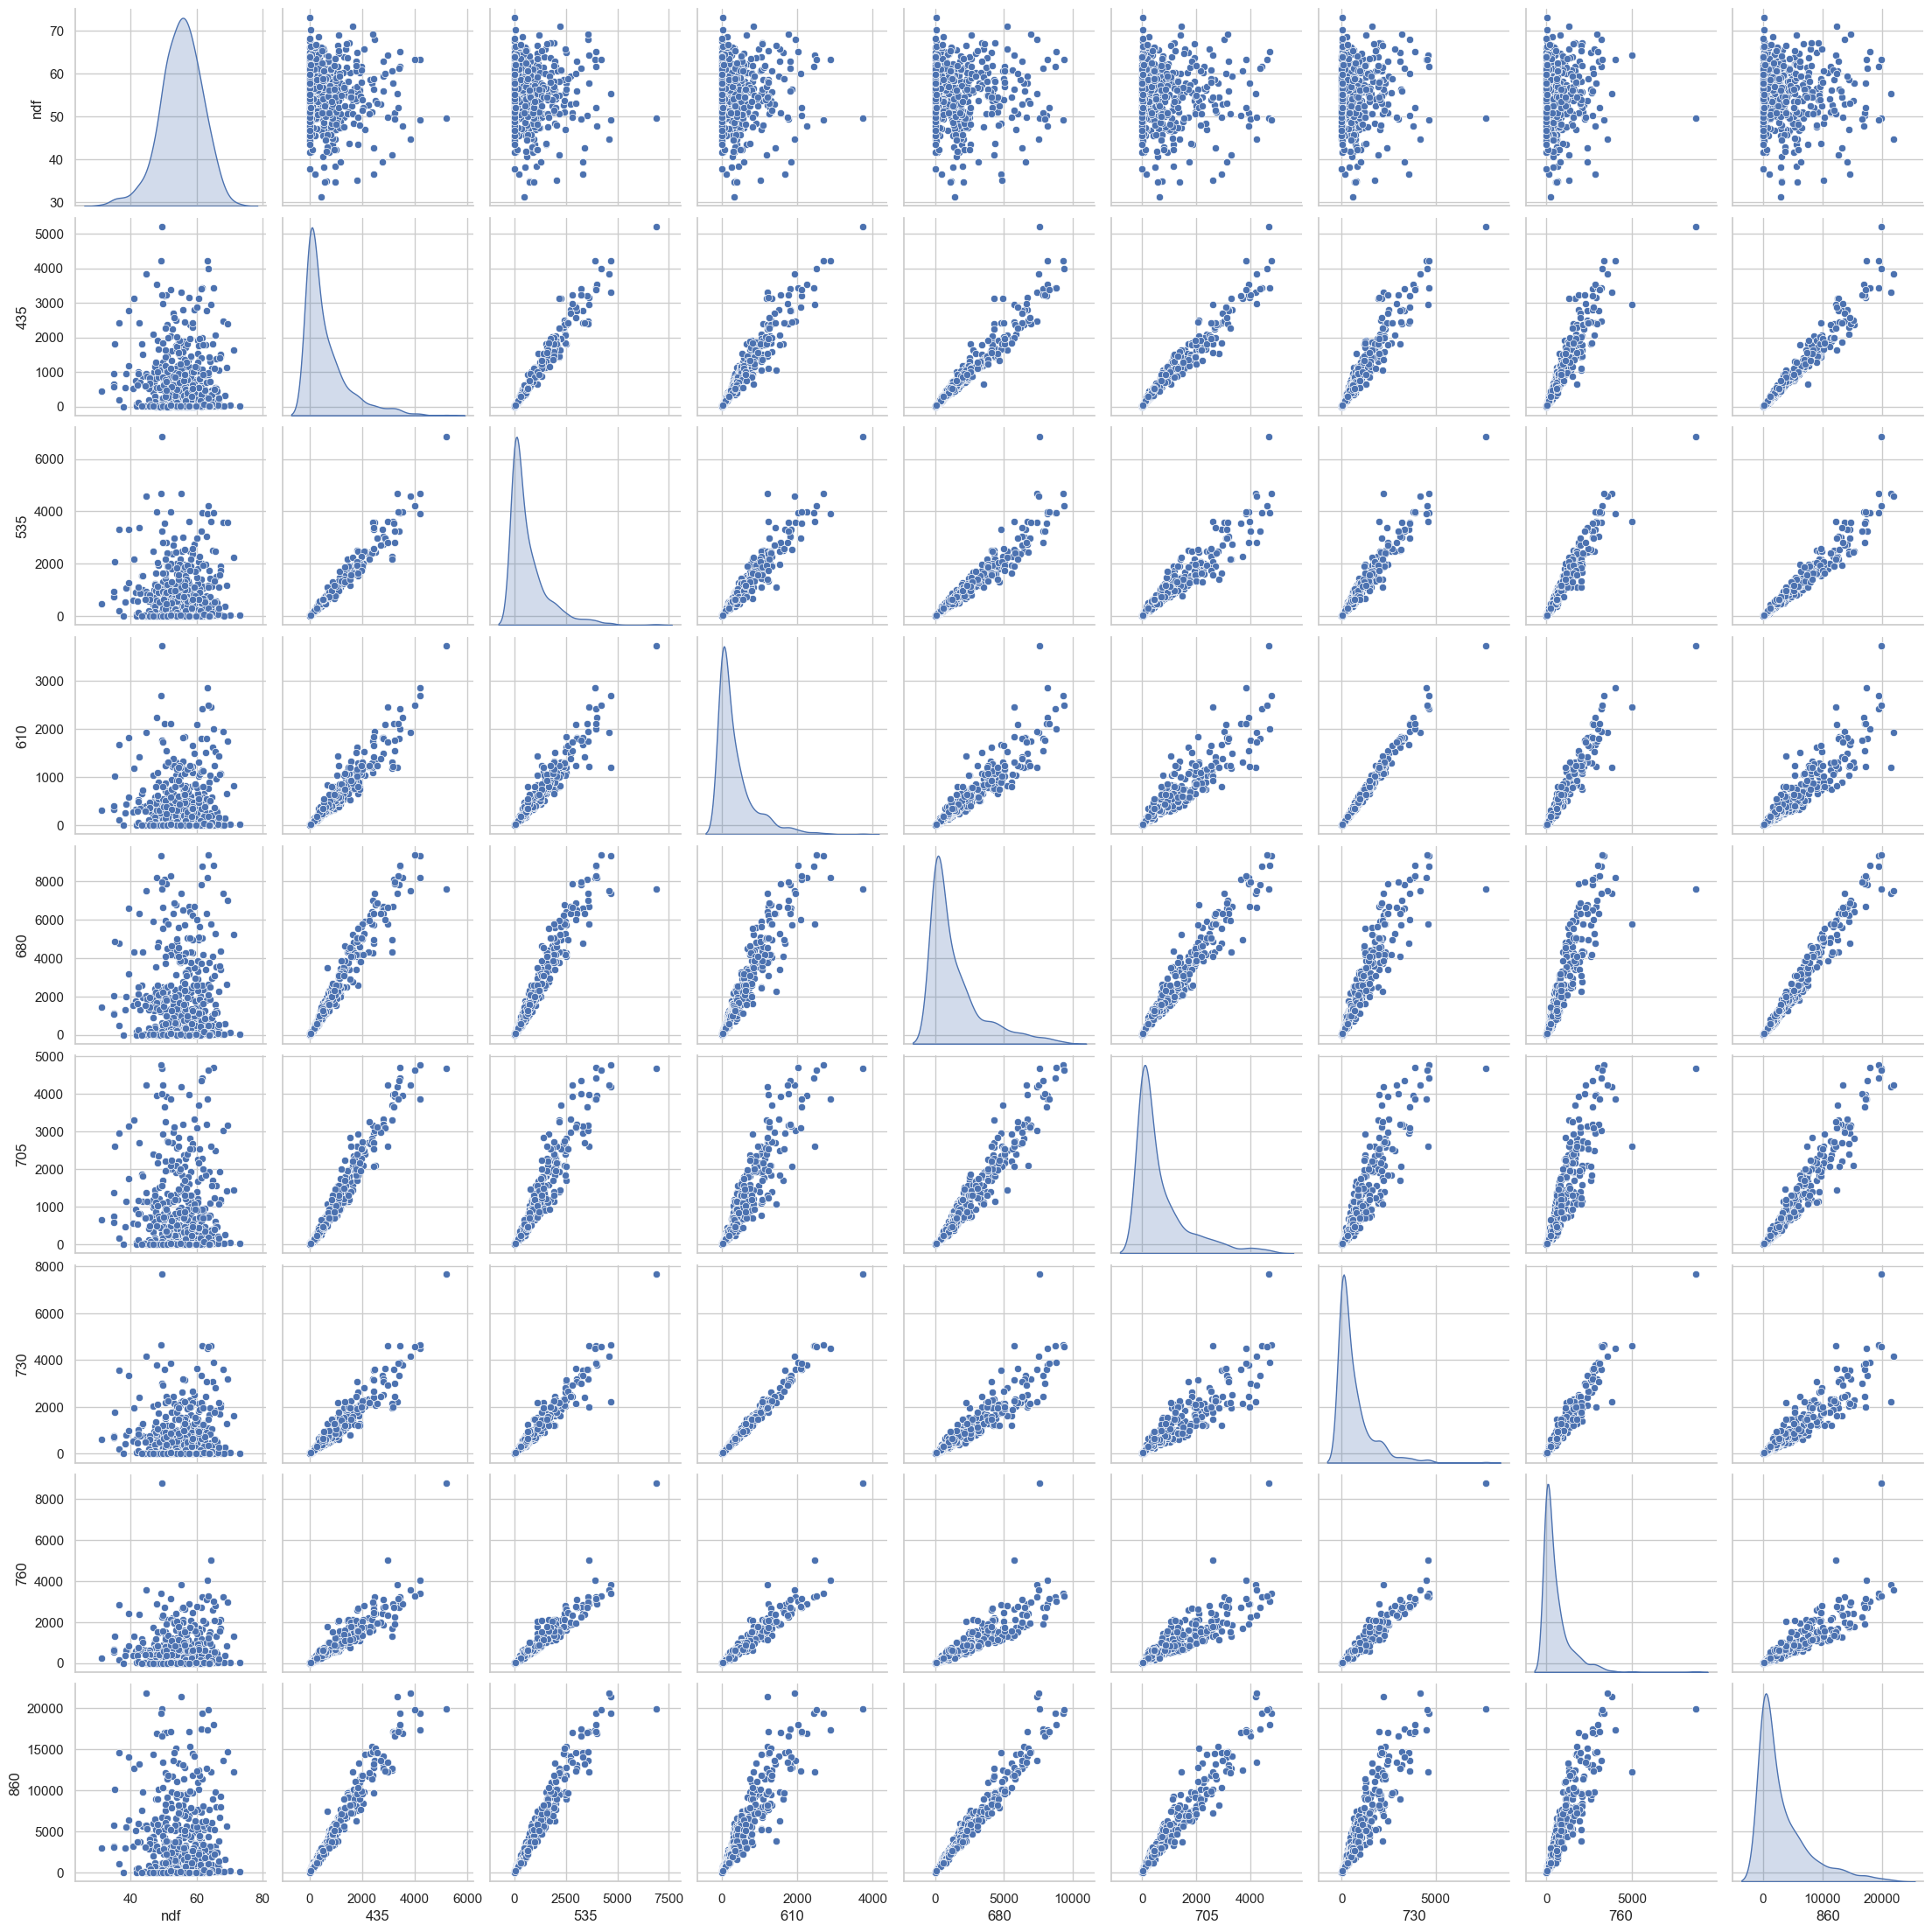

In [14]:
data_sub = data.loc[:, ["ndf", "435", "535", "610", "680", "705", "730", "760", "860"]]
sns.pairplot(data_sub, diag_kind="kde")

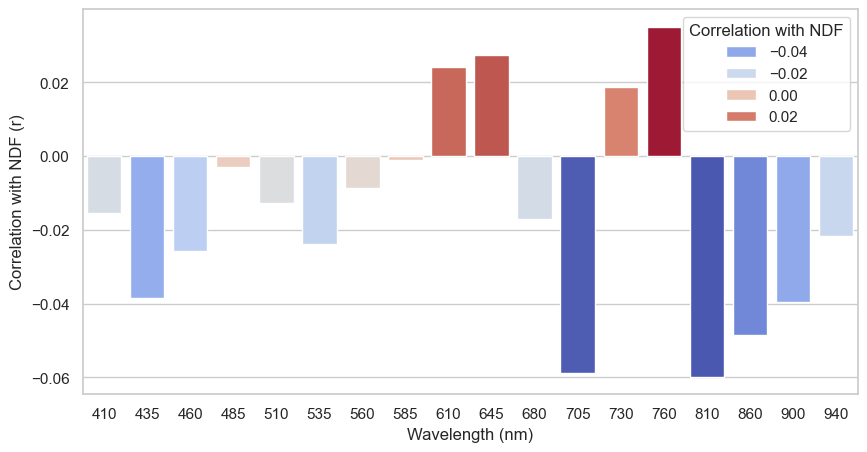

In [27]:
pd_cor = loader.X(in_array=False) # get features X
pd_cor["ndf"] = data["ndf"] # add target y
pd_cor = pd_cor.corr() # calculate pair-wise correlations
pd_cor = pd_cor.loc["ndf", :].drop("ndf") # get correlations with target
pd_cor = pd_cor.reset_index() # reset index: [index, ndf]
plt.figure(figsize=(10, 5))
sns.barplot(data=pd_cor, 
            x="index", y="ndf",
            hue="ndf",
            palette='coolwarm')
plt.ylabel("Correlation with NDF (r)")
plt.xlabel("Wavelength (nm)")
plt.legend(title="Correlation with NDF")

Text(0.5, 0, 'PC1 (97.12% variance of 18 wavelengths)')

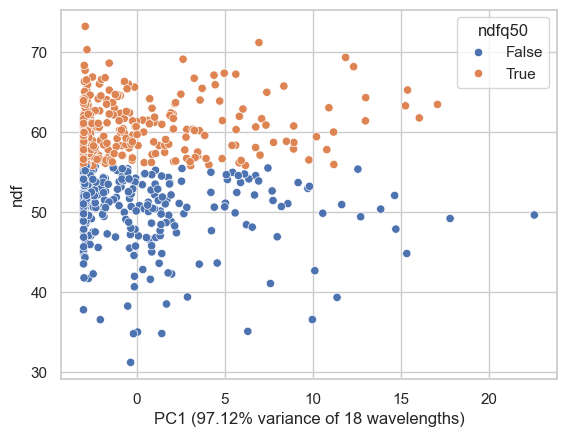

In [28]:
sns.scatterplot(data=data, x="PC1", y="ndf", hue="ndfq50") # 97.12% variance
plt.xlabel("PC1 (97.12% variance of 18 wavelengths)")

### Block effects (pasture coverage) on the target variable (NDF)

In [19]:
# plotting parameters
params_facet = {"aspect": 1.5, "height": 4}
params_hist = {"kde": True, "binwidth": 2}
order_pasture = ["Poor", "Moderate", "Good"]
order_season = ["MayJun", "JulAug", "SepOct"]
data_long["wv"] = data_long["wv"].astype(int)

<Figure size 900x600 with 0 Axes>

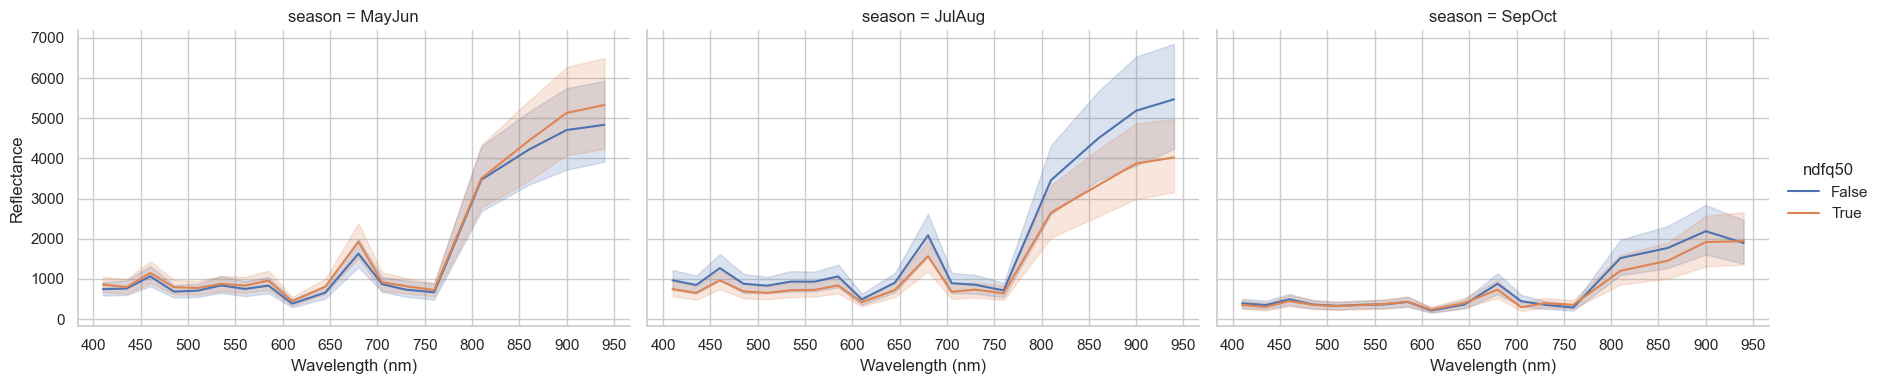

In [27]:
plt.figure(figsize=(9, 6))
g = sns.FacetGrid(data_long,
    col="season", col_order=order_season, hue="ndfq50",
    **params_facet)
g.map(sns.lineplot, "wv", "value",)
g.add_legend()
g.set(xticks=[i for i in range(400, 1000, 50)])
g.set_xlabels("Wavelength (nm)")
g.set_ylabels("Reflectance")
plt.savefig("../out/real_spectral_season_X.png", dpi=300)

<Figure size 2700x1800 with 0 Axes>

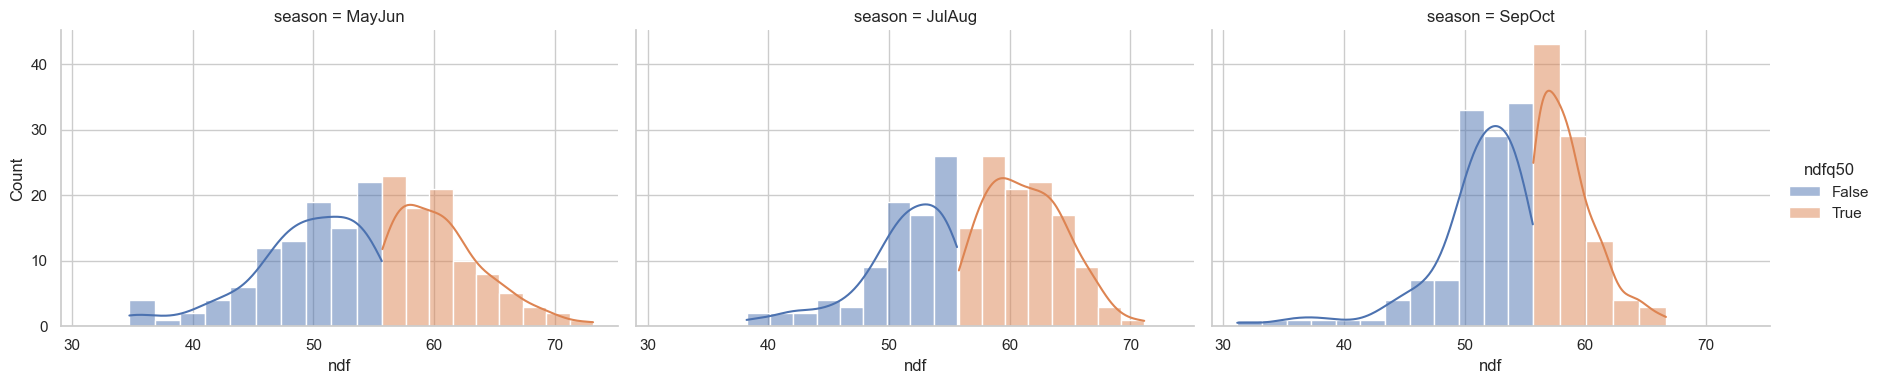

In [24]:
plt.figure(figsize=(9, 6), dpi=300)
g = sns.FacetGrid(data,
    col="season", col_order=order_season, 
    hue="ndfq50", **params_facet)
g.map(sns.histplot, "ndf", **params_hist)
g.add_legend()
plt.savefig("../out/real_spectral_season_y.png", dpi=300)

In [ ]:
data_grouped = data.groupby(["season", "ndfq50"]).agg(
    count=("id", "count"),
    mean=("ndf", "mean"),
    median=("ndf", "median"),
    std=("ndf", "std")
).reset_index()
data_grouped

,season,ndfq50,count,mean,median,std
0,JulAug,False,84,51.098586,51.781537,3.895983
1,JulAug,True,114,61.328663,61.199816,3.291074
2,MayJun,False,98,49.284877,50.028765,4.905249
3,MayJun,True,91,60.571324,60.258532,3.764591
4,SepOct,False,120,50.871516,51.838845,4.256844
5,SepOct,True,92,58.552624,58.209485,2.425566


In [ ]:
data_grouped = data.groupby(["season"]).agg(
    count=("id", "count"),
    mean=("ndf", "mean"),
    median=("ndf", "median"),
    std=("ndf", "std")
).reset_index()
data_grouped

,season,count,mean,median,std
0,JulAug,198,56.988630,57.586214,6.188750
1,MayJun,189,54.719092,55.457815,7.153368
2,SepOct,212,54.204827,54.538041,5.226698
